# Income Dataset

In [1]:
#import stuffs
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. ETL

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

In [4]:
df.head()

,age,sex,education,education-num,marital-status,workclass,occupation,hours-per-week,income,label
0,27,Male,HS-grad,9,Never-married,Private,Craft-repair,40,<=50K,0
1,47,Male,Masters,14,Married,Local-gov,Exec-managerial,50,>50K,1
2,59,Male,HS-grad,9,Divorced,Self-emp,Prof-specialty,20,<=50K,0
3,38,Female,Prof-school,15,Never-married,Federal-gov,Prof-specialty,57,>50K,1
4,64,Female,11th,7,Widowed,Private,Farming-fishing,40,<=50K,0


## 2. EDA

In [5]:
df.describe()

,age,education-num,hours-per-week,label
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,37.144100,10.280133,41.384033,0.276667
std,12.856173,2.479556,9.684555,0.447358
min,18.000000,3.000000,20.000000,0.000000
25%,26.000000,9.000000,40.000000,0.000000
50%,36.000000,10.000000,40.000000,0.000000
75%,46.000000,13.000000,45.000000,1.000000
max,90.000000,16.000000,90.000000,1.000000


In [6]:
df.label.value_counts()
#imbalance

0    21700
1     8300
Name: label, dtype: int64

In [7]:
df.education.value_counts()

HS-grad         9610
Some-college    6641
Bachelors       5422
Masters         1803
Assoc-voc       1201
11th             997
Assoc-acdm       982
10th             735
Prof-school      626
7th-8th          483
9th              466
12th             376
Doctorate        366
5th-6th          292
Name: education, dtype: int64

In [8]:
df['education-num'].value_counts()

9     9610
10    6641
13    5422
14    1803
11    1201
7      997
12     982
6      735
15     626
4      483
5      466
8      376
16     366
3      292
Name: education-num, dtype: int64

### 2.1 Univariate Analysis
- look at oen variavle
- main tools - countplot and displot
- countplot for discrete features
- displot for continuous features

In [9]:
df.columns

Index(['age', 'sex', 'education', 'education-num', 'marital-status',
       'workclass', 'occupation', 'hours-per-week', 'income', 'label'],
      dtype='object')

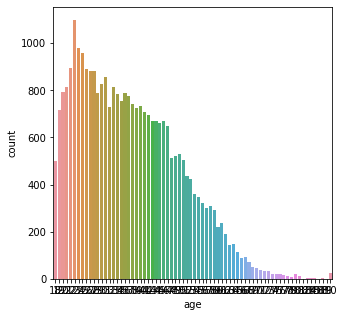

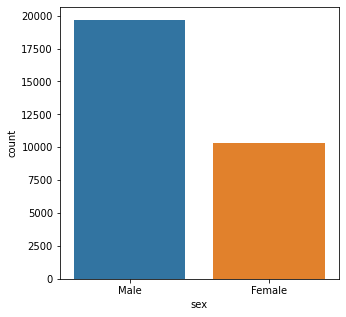

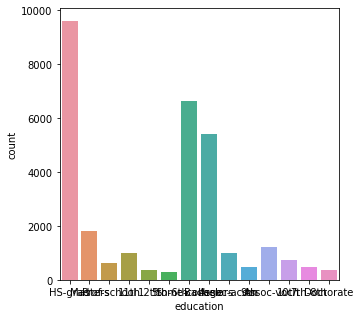

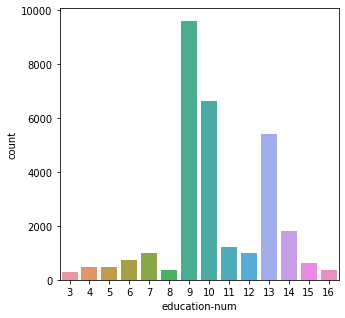

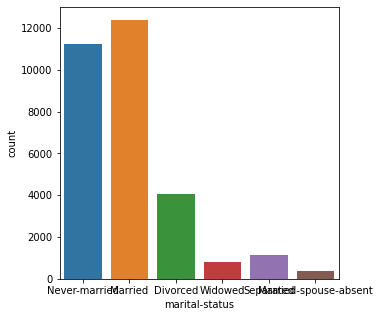

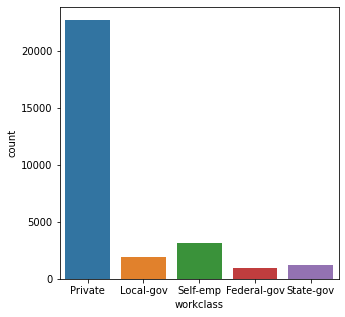

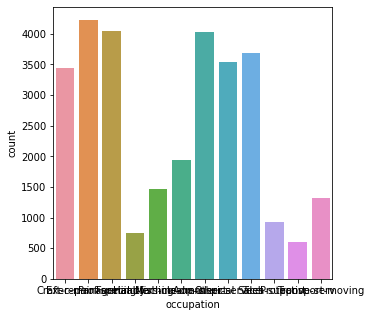

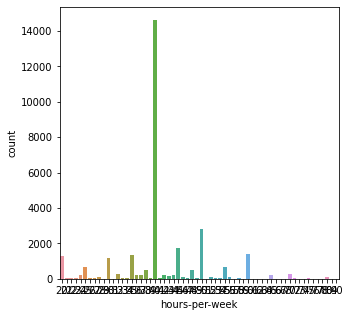

In [10]:
categorical = ['age','sex','education','education-num','marital-status','workclass', 'occupation','hours-per-week']

for col in categorical:
    plt.figure(figsize = (5,5))
    sns.countplot(x=col,data=df)
    plt.show()

In [11]:
#workclass is dominant (consider it)
#hours-per-week is dominant (consider it)

### 2.2 Multivariate analysis
- look at two featuress/labels at the same time
- e.g., see how bathroomms affect Rent -> bivaraint analysis
- e.g., see hwo size affect Rent
- usually, y is label and x is any giben feature
- Goal: which factor/features are somwhow related tomy label, i.e., Rent
- boxplot : for discrete vs continuous features
- scatterplot : for continuous vs continuous features

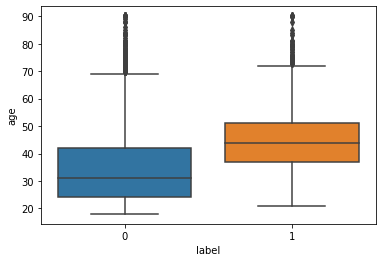

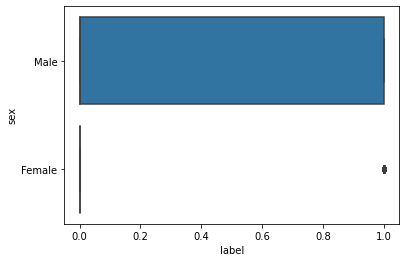

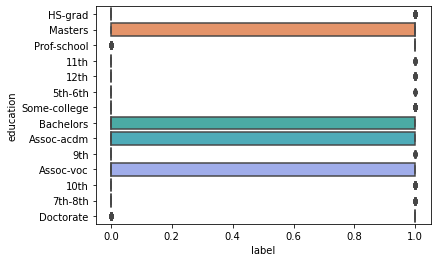

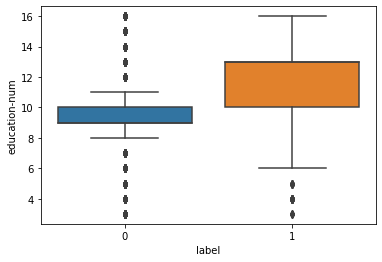

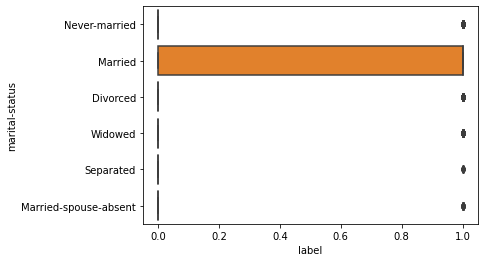

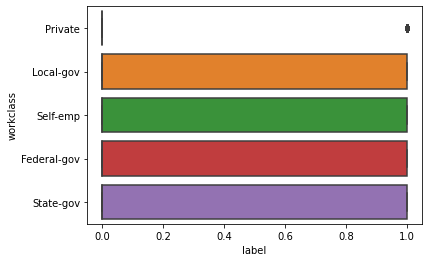

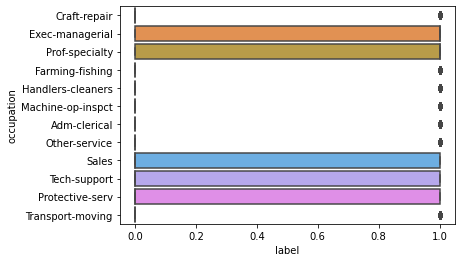

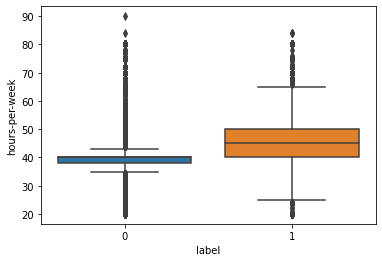

In [12]:
numerical = ['age','sex','education','education-num','marital-status','workclass', 'occupation','hours-per-week']

for col in numerical:
    sns.boxplot(x=df.label,y=df[col])
    plt.show()

# 0 <=50K
# 1 >50K  

In [13]:
#Male is dominant (consider it)
#Married in material status column is outstanding (consider it)

<AxesSubplot:>

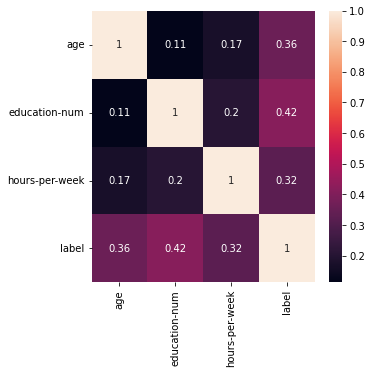

In [14]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot =True)

## 3. Feature Engineering

## 4. Feature Extraction

## 5. Categorify

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30000 non-null  int64 
 1   sex             30000 non-null  object
 2   education       30000 non-null  object
 3   education-num   30000 non-null  int64 
 4   marital-status  30000 non-null  object
 5   workclass       30000 non-null  object
 6   occupation      30000 non-null  object
 7   hours-per-week  30000 non-null  int64 
 8   income          30000 non-null  object
 9   label           30000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


In [16]:
#columns name
cat_cols = ['sex',
            'marital-status',
            'education',
            'workclass', 
            'occupation']
cont_cols = ['age', 'hours-per-week']
y = ['label'] #classification

In [17]:
for col in cat_cols:
    df[col] = df[col].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30000 non-null  int64   
 1   sex             30000 non-null  category
 2   education       30000 non-null  category
 3   education-num   30000 non-null  int64   
 4   marital-status  30000 non-null  category
 5   workclass       30000 non-null  category
 6   occupation      30000 non-null  category
 7   hours-per-week  30000 non-null  int64   
 8   income          30000 non-null  object  
 9   label           30000 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 1.3+ MB


## 6. Cleaning 

In [19]:
df.isna().sum() 
#There are any features missing

age               0
sex               0
education         0
education-num     0
marital-status    0
workclass         0
occupation        0
hours-per-week    0
income            0
label             0
dtype: int64

## 7. Define X and y

In [20]:
#stack the 'sex','marital-status','education', 'workclass', 'occupation' as one vector
sex = df.sex.cat.codes.values #[vector of hours, e.g., 0, 4, 2]
status = df['marital-status'].cat.codes.values
education = df.education.cat.codes.values
workclass = df.workclass.cat.codes.values
occupation = df.occupation.cat.codes.values
cat = np.stack([sex,status,education,workclass,occupation], axis=1)

cat[:5] 
cat.shape #(30000 samples,5 features)

(30000, 5)

In [21]:
#convert this numpy to tensor
cat = torch.tensor(cat, dtype=torch.int64)
cat[:3]

tensor([[ 1,  3, 10,  2,  1],
        [ 1,  1, 11,  1,  2],
        [ 1,  0, 10,  3,  7]])

In [22]:
age = df.age.values #.values give you the numpy vector
hrpw = df['hours-per-week'].values
conts = np.stack([age,hrpw],axis=1)
conts = torch.tensor(conts, dtype=torch.float32)

conts[:4]
conts.shape #30000,2

torch.Size([30000, 2])

In [23]:
y = torch.tensor(df[y].values).reshape(-1) #or flatten(-1)
y.shape

torch.Size([30000])

## 8. Determine the embedding size

- Before we create the embedding, we need to specify the embedding size...
- Two ways: 
    - randomly pick a size 
        - min(50, unique/2)
    - specify a size

In [24]:
#get the size of all my categorical cols
cat_size = [len(df[col].cat.categories) for col in cat_cols]
cat_size

[2, 6, 14, 5, 12]

In [25]:
emb_size = [(size,min(50,size//2)) for size in cat_size]
emb_size

[(2, 1), (6, 3), (14, 7), (5, 2), (12, 6)]

## 9. Try to illstrate how Embedding layer works

In [26]:
sample = cat[:1]
sample
twosample = cat[:2]
twosample

tensor([[ 1,  3, 10,  2,  1],
        [ 1,  1, 11,  1,  2]])

In [27]:
embed_layers = nn.ModuleList([nn.Embedding(unique,emb_s) for unique, emb_s in emb_size])
embed_layers

ModuleList(
  (0): Embedding(2, 1)
  (1): Embedding(6, 3)
  (2): Embedding(14, 7)
  (3): Embedding(5, 2)
  (4): Embedding(12, 6)
)

In [28]:
#empty embedding
sample_embedding = []

for i,e in enumerate(embed_layers):
    sample_embedding.append(e(twosample[:,i]))  #apply embedding layer to colummn i
                                                #apply embedding layer 0 to colummn 0
sample_embedding

[tensor([[-0.1787],
         [-0.1787]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.4148,  0.4966, -0.3954],
         [ 1.2967, -0.6402, -0.2178]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.2032,  0.4963,  0.0844, -2.0641,  0.2533, -0.0992,  0.1662],
         [ 2.1511,  0.4910, -0.0367, -0.3763,  0.8481,  0.9386, -0.2816]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.1105, -0.2779],
         [-0.0677, -0.7789]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 1.1642,  1.2811, -0.6740,  1.1338,  1.3182,  0.6881],
         [ 0.0568,  0.0232, -1.0658, -2.0339,  0.6902,  0.7103]],
        grad_fn=<EmbeddingBackward0>)]

In [29]:
final_embedding = torch.cat(sample_embedding, axis = 1)
final_embedding

tensor([[-0.1787,  1.4148,  0.4966, -0.3954,  0.2032,  0.4963,  0.0844, -2.0641,
          0.2533, -0.0992,  0.1662,  1.1105, -0.2779,  1.1642,  1.2811, -0.6740,
          1.1338,  1.3182,  0.6881],
        [-0.1787,  1.2967, -0.6402, -0.2178,  2.1511,  0.4910, -0.0367, -0.3763,
          0.8481,  0.9386, -0.2816, -0.0677, -0.7789,  0.0568,  0.0232, -1.0658,
         -2.0339,  0.6902,  0.7103]], grad_fn=<CatBackward0>)

In [30]:
dl = nn.Dropout(0.5)
final_embedding = dl(final_embedding)
final_embedding 

tensor([[-0.0000,  0.0000,  0.9932, -0.0000,  0.0000,  0.9926,  0.0000, -0.0000,
          0.0000, -0.1985,  0.3325,  2.2210, -0.0000,  2.3284,  0.0000, -1.3480,
          2.2676,  2.6364,  1.3762],
        [-0.3573,  0.0000, -1.2803, -0.4356,  4.3022,  0.9819, -0.0734, -0.0000,
          0.0000,  1.8771, -0.0000, -0.1353, -1.5579,  0.0000,  0.0464, -2.1317,
         -4.0678,  1.3803,  1.4207]], grad_fn=<MulBackward0>)

In [31]:
sample_cont = conts[:2]
sample_cont

tensor([[27., 40.],
        [47., 50.]])

In [32]:
sample_cont = sample_cont.type(torch.float32)

In [33]:
batch_norm1d = nn.BatchNorm1d(2)
output = batch_norm1d(sample_cont)
output #across features

tensor([[-1., -1.],
        [ 1.,  1.]], grad_fn=<NativeBatchNormBackward0>)

## 10. Define the model

In [34]:
class NeuralNetwork(nn.Module):
    
    def __init__(self, emb_size, cont_size, out_size, layer_size = [200,100], p = 0.5):
        super().__init__()
        self.embed_layer = nn.ModuleList([nn.Embedding(unique, emb_s) for unique, emb_s in emb_size])
        self.dropout = nn.Dropout(p)
        self.batchnorm1d = nn.BatchNorm1d(cont_size)

        #calculate input_size
        cat_size = sum(emb_s for _, emb_s in emb_size)
        input_size = cat_size + cont_size
        #Linear(input_size,200) -> Relu -> batchnorm -> dropout
        #Linear(200,100) -> Relu -> batchnorm -> dropout
        #Linear(100,out_size) 
        
        layerlist = []

        for i in layer_size:
            layerlist.append(nn.Linear(input_size,i)) #(input_size,200)
            layerlist.append(nn.ReLU(inplace=True)) 
            layerlist.append(nn.BatchNorm1d(i)) 
            layerlist.append(nn.Dropout(p))
            input_size = i 
        layerlist.append(nn.Linear(layer_size[-1],out_size))

        self.layers = nn.Sequential(*layerlist) #* is same as nn.ModuleList

    def forward(self, x_cat,x_cont):
        #x_cat : (30000,5)
        #x_cont : (30000,2)
        embeddings = []
        for i,e in enumerate(self.embed_layer):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1) 
        #x : (30000,16)

        x = self.dropout(x)
        x_cont = self.batchnorm1d(x_cont)
        #x_cont : (30000,2)

        x = torch.cat([x,x_cont],1)
        #x: (30000,24)

        x = self.layers(x)

        return x

In [35]:
model = NeuralNetwork(emb_size, conts.shape[1], len(y.unique()))
model

NeuralNetwork(
  (embed_layer): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(6, 3)
    (2): Embedding(14, 7)
    (3): Embedding(5, 2)
    (4): Embedding(12, 6)
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (batchnorm1d): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=21, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

## Training!!!

In [36]:
#define loss function
J_fn = nn.CrossEntropyLoss()

In [37]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [38]:
#train test split
train_size = 24000
test_size = 6000

#use your numpy indexing technique
cat_train = cat[:train_size]
cat_test = cat[train_size:test_size+train_size]
cont_train = conts[:train_size]
cont_test = conts[train_size:test_size+train_size]
y_train = y[:train_size]
y_test = y[train_size:test_size+train_size]

In [39]:
epochs  = 100

losses = []

for i in range(epochs):
    yhat = model(cat_train,cont_train)
    loss = J_fn(yhat,y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 10 == 0:
        print(f'Epoch: {i:2.0f}; Loss: {loss:3.2f}')

Epoch:  0; Loss: 0.82
Epoch: 10; Loss: 0.45
Epoch: 20; Loss: 0.39
Epoch: 30; Loss: 0.34
Epoch: 40; Loss: 0.33
Epoch: 50; Loss: 0.32
Epoch: 60; Loss: 0.31
Epoch: 70; Loss: 0.31
Epoch: 80; Loss: 0.30
Epoch: 90; Loss: 0.30


In [40]:
train_loss = [loss.item() for loss in losses]

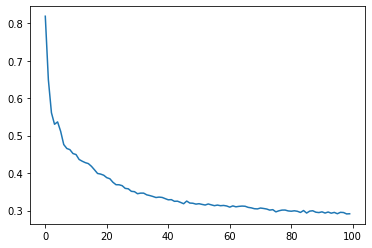

In [41]:
plt.plot(range(epochs),train_loss)

# 11. Testing/Inference

In [42]:
from sklearn.metrics import accuracy_score

with torch.no_grad():
    yhat = model(cat_test, cont_test)
    loss = J_fn(yhat, y_test)
    predicted = torch.max(yhat, 1)[1]
    acc  = accuracy_score(predicted, y_test)
    
print(acc)

0.8605
